**1. Import libraries and the dataset**

First we import the libraries we need for this project and then import the dataset as a DataFrame.

In [1]:
# Import the modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# import the dataset as a DataFrame
df = pd.read_csv("germany_housing_data_14.07.2020.csv")

Check the structure of the dataset.

In [2]:
# check number of observations and features
df.shape


(10552, 26)

In [3]:
# check the first entries
df.head()

,Unnamed: 0,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,Condition,Heating,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,2005.0,normal,NaN,modernized,central heating,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,NaN,1994.0,basic,NaN,modernized,stove heating,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.0,2013.0,NaN,NaN,dilapidated,stove heating,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,1900.0,basic,2000.0,fixer-upper,central heating,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,1968.0,refined,2019.0,refurbished,central heating,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


In [4]:
# inspect the column names (names of the features)
df.columns

Index(['Unnamed: 0', 'Price', 'Type', 'Living_space', 'Lot', 'Usable_area',
       'Free_of_Relation', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floors',
       'Year_built', 'Furnishing_quality', 'Year_renovated', 'Condition',
       'Heating', 'Energy_source', 'Energy_certificate',
       'Energy_certificate_type', 'Energy_consumption',
       'Energy_efficiency_class', 'State', 'City', 'Place', 'Garages',
       'Garagetype'],
      dtype='object')

**2. Data cleaning**

Let's inspect the dataset structure and check whether there are missing values

In [5]:
# inspect the type of each variable
df.dtypes

Unnamed: 0                   int64
Price                      float64
Type                        object
Living_space               float64
Lot                        float64
Usable_area                float64
Free_of_Relation            object
Rooms                      float64
Bedrooms                   float64
Bathrooms                  float64
Floors                     float64
Year_built                 float64
Furnishing_quality          object
Year_renovated             float64
Condition                   object
Heating                     object
Energy_source               object
Energy_certificate          object
Energy_certificate_type     object
Energy_consumption         float64
Energy_efficiency_class     object
State                       object
City                        object
Place                       object
Garages                    float64
Garagetype                  object
dtype: object

In [6]:
# check the number of non-missing entries in each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10552 non-null  int64  
 1   Price                    10552 non-null  float64
 2   Type                     10150 non-null  object 
 3   Living_space             10552 non-null  float64
 4   Lot                      10552 non-null  float64
 5   Usable_area              5568 non-null   float64
 6   Free_of_Relation         6983 non-null   object 
 7   Rooms                    10552 non-null  float64
 8   Bedrooms                 6878 non-null   float64
 9   Bathrooms                8751 non-null   float64
 10  Floors                   7888 non-null   float64
 11  Year_built               9858 non-null   float64
 12  Furnishing_quality       7826 non-null   object 
 13  Year_renovated           5349 non-null   float64
 14  Condition             

In [7]:
# check the variables for which there is at least one missing value
df.isnull().any()

Unnamed: 0                 False
Price                      False
Type                        True
Living_space               False
Lot                        False
Usable_area                 True
Free_of_Relation            True
Rooms                      False
Bedrooms                    True
Bathrooms                   True
Floors                      True
Year_built                  True
Furnishing_quality          True
Year_renovated              True
Condition                   True
Heating                     True
Energy_source               True
Energy_certificate          True
Energy_certificate_type     True
Energy_consumption          True
Energy_efficiency_class     True
State                       True
City                        True
Place                       True
Garages                     True
Garagetype                  True
dtype: bool

In [8]:
# check the proportion of missing values for each variable
df.isnull().sum() / df.shape[0]

Unnamed: 0                 0.000000
Price                      0.000000
Type                       0.038097
Living_space               0.000000
Lot                        0.000000
Usable_area                0.472328
Free_of_Relation           0.338230
Rooms                      0.000000
Bedrooms                   0.348180
Bathrooms                  0.170679
Floors                     0.252464
Year_built                 0.065770
Furnishing_quality         0.258340
Year_renovated             0.493082
Condition                  0.030610
Heating                    0.055345
Energy_source              0.116281
Energy_certificate         0.071550
Energy_certificate_type    0.334155
Energy_consumption         0.769428
Energy_efficiency_class    0.456691
State                      0.000095
City                       0.000095
Place                      0.027483
Garages                    0.185747
Garagetype                 0.185747
dtype: float64

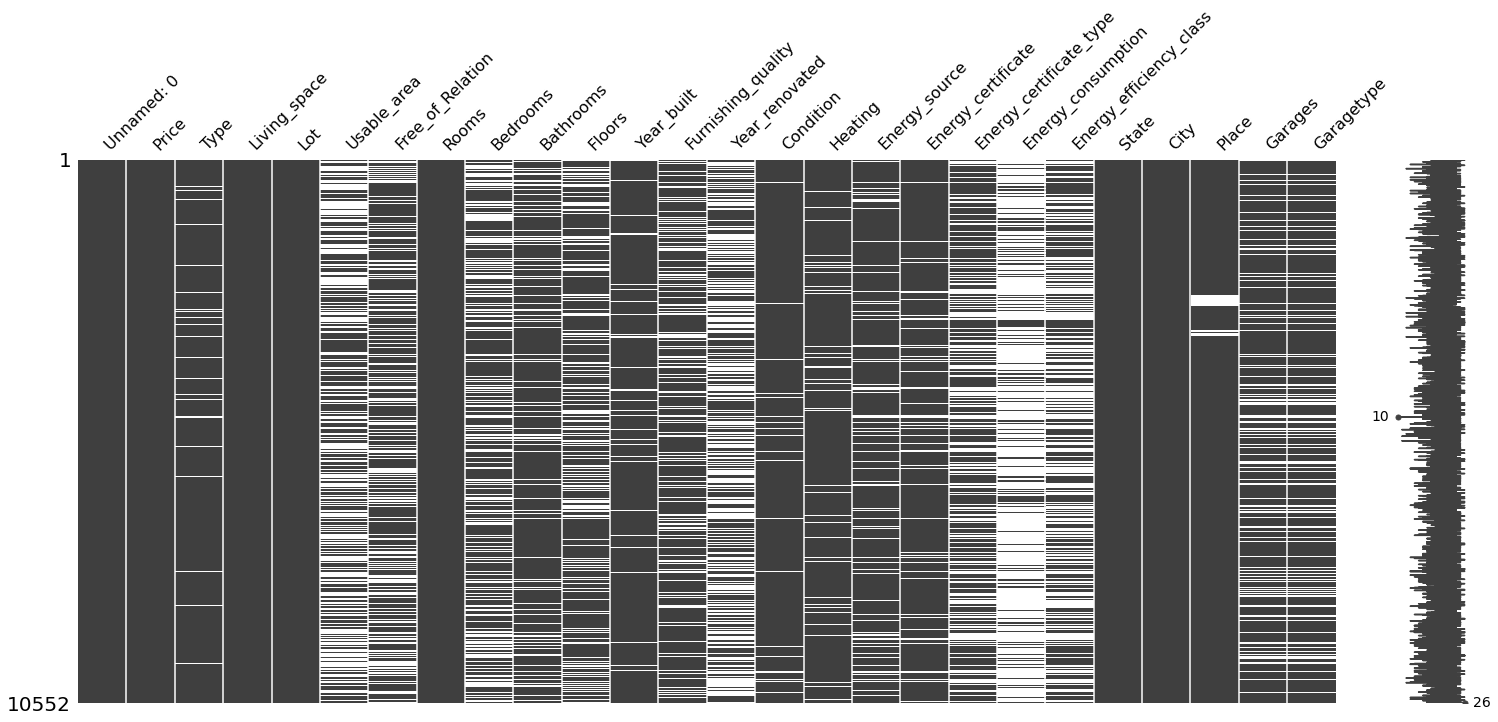

In [9]:
# check the distribution of missing values
msno.matrix(df)

The dataset has a large number of missing data for some variables, and this can create problems in the later analysis.

Ideally we would directly drop all the rows that contain missing data for any variable, but in this case we would obtain a cleaned dataset with very few observations.

In order to maintain a good number of observations, let's focus only on the most relevant variables which have fewer missing values, and exclude those that are less likely to have relationships with price or with each other, or that present a large number of missing values. This way we can create a smaller version of the dataset where we can exclude all missing values and still retain a good number of observations.

In [10]:
# exclude non relevant features
df = df.drop(columns = ['Usable_area', 'Free_of_Relation', 'Floors', 'Furnishing_quality', 'Year_renovated', 'Energy_source', 'Energy_certificate', 'Energy_certificate_type', 'Energy_consumption', 'Energy_efficiency_class', 'Place', 'City', 'Garagetype'])

# drop all the observations with missing data
df = df.dropna()

# check dimensions of the dataftame
df.shape

(4983, 13)

In [11]:
# check the new dataset
df.head()

,Unnamed: 0,Price,Type,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Year_built,Condition,Heating,State,Garages
0,0,498000.0,Multiple dwelling,106.00,229.0,5.5,3.0,1.0,2005.0,modernized,central heating,Baden-Württemberg,2.0
1,1,495000.0,Mid-terrace house,140.93,517.0,6.0,3.0,2.0,1994.0,modernized,stove heating,Baden-Württemberg,7.0
2,2,749000.0,Farmhouse,162.89,82.0,5.0,3.0,2.0,2013.0,dilapidated,stove heating,Baden-Württemberg,1.0
4,4,469000.0,Multiple dwelling,115.00,244.0,4.5,2.0,1.0,1968.0,refurbished,central heating,Baden-Württemberg,1.0
8,8,364000.0,Duplex,227.00,973.0,10.0,4.0,4.0,1809.0,modernized,central heating,Baden-Württemberg,8.0


Let's check some summary statistics for the numerical variables.

In [12]:
# Check the ranges of values and other key statistics of the numerical variables
df.describe()

,Unnamed: 0,Price,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Year_built,Garages
count,4983.000000,4.983000e+03,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,5140.415613,5.720931e+05,205.303749,1289.497010,6.896849,4.153121,2.261690,1965.407184,2.525186
std,2984.395413,5.927270e+05,119.181915,4557.211228,3.861733,2.401666,1.613544,47.260769,2.666254
min,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,1430.000000,1.000000
25%,2529.000000,2.790000e+05,133.000000,411.000000,5.000000,3.000000,1.000000,1950.000000,1.000000
50%,5103.000000,4.300000e+05,175.000000,680.000000,6.000000,4.000000,2.000000,1975.000000,2.000000
75%,7632.500000,6.790000e+05,242.000000,1035.500000,8.000000,5.000000,3.000000,1998.000000,3.000000
max,10551.000000,1.300000e+07,2027.680000,160000.000000,84.000000,61.000000,40.000000,2022.000000,65.000000


Let's check the number of different values for some of the categorical variables in the dataset, such as State, furnishing quality, condition of the property, type of heating etc.

In [13]:
# inspect the values of the 'State' variable
df['State'].unique()

array(['Baden-Württemberg', 'Rheinland-Pfalz', 'Hessen', 'Bayern',
       'Berlin', 'Brandenburg', 'Bremen', 'Niedersachsen', 'Hamburg',
       'Nordrhein-Westfalen', 'Mecklenburg-Vorpommern', 'Saarland',
       'Sachsen', 'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'],
      dtype=object)

In [14]:
# inspect the values of the 'Type' variable
df['Type'].unique()

array(['Multiple dwelling', 'Mid-terrace house', 'Farmhouse', 'Duplex',
       'Single dwelling', 'Residential property', 'Special property',
       'Villa', 'Corner house', 'Bungalow', 'Castle'], dtype=object)

In [15]:
# inspect the values of the 'condition' variable
df['Condition'].unique()

array(['modernized', 'dilapidated', 'refurbished', 'maintained', 'as new',
       'renovated', 'first occupation after refurbishment', 'fixer-upper',
       'first occupation', 'by arrangement'], dtype=object)

In [16]:
# inspect the values of the 'heating' variable
df['Heating'].unique()

array(['central heating', 'stove heating', 'oil heating', 'gas heating',
       'underfloor heating', 'heat pump', 'night storage heater',
       'floor heating', 'district heating', 'electric heating',
       'solar heating', 'wood-pellet heating', 'cogeneration units'],
      dtype=object)

Plot a bar chart to visualise the distribution of properties across different regions. It looks like the dataset captures properties across all the states, but most of the properties are located in the following 6 states: Baden-Wuerttemberg, Rheinland-Pfalz, Hessen, Bayern, Niedersachsen, Nordrhein-Westfalen.

[Text(0, 0, 'Baden-Württemberg'),
 Text(0, 0, 'Rheinland-Pfalz'),
 Text(0, 0, 'Hessen'),
 Text(0, 0, 'Bayern'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'Brandenburg'),
 Text(0, 0, 'Bremen'),
 Text(0, 0, 'Niedersachsen'),
 Text(0, 0, 'Hamburg'),
 Text(0, 0, 'Nordrhein-Westfalen'),
 Text(0, 0, 'Mecklenburg-Vorpommern'),
 Text(0, 0, 'Saarland'),
 Text(0, 0, 'Sachsen'),
 Text(0, 0, 'Sachsen-Anhalt'),
 Text(0, 0, 'Schleswig-Holstein'),
 Text(0, 0, 'Thüringen')]

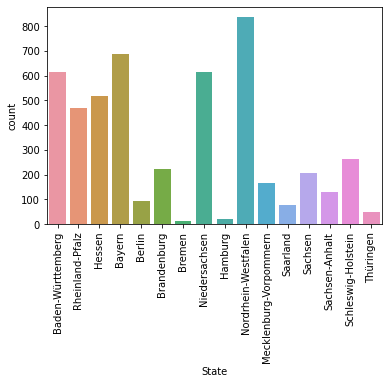

In [17]:
# Bar chart to display the distribution of houses over the different States
chart = sns.countplot(x='State', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Alternatively, we can use matplotlib to produce a pie chart:

Text(0.5, 1.0, 'Observations by State')

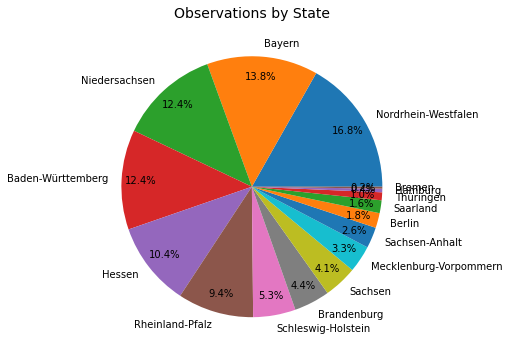

In [18]:
# Pie chart of distribution of observations across states
pie, ax = plt.subplots(figsize=[10,6])
data = df['State'].value_counts()
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.85)
plt.title("Observations by State", fontsize=14)

Let's also have a look at the distribution of observations across different types of house.

[Text(0, 0, 'Multiple dwelling'),
 Text(0, 0, 'Mid-terrace house'),
 Text(0, 0, 'Farmhouse'),
 Text(0, 0, 'Duplex'),
 Text(0, 0, 'Single dwelling'),
 Text(0, 0, 'Residential property'),
 Text(0, 0, 'Special property'),
 Text(0, 0, 'Villa'),
 Text(0, 0, 'Corner house'),
 Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Castle')]

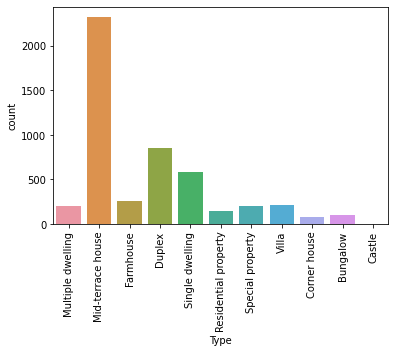

In [19]:
# Bar chart to display the distribution of houses over the different house types
chart = sns.countplot(x='Type', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [20]:
# generate the count of values
df['Type'].value_counts()

Mid-terrace house       2324
Duplex                   854
Single dwelling          587
Farmhouse                256
Villa                    214
Special property         208
Multiple dwelling        207
Residential property     146
Bungalow                 102
Corner house              83
Castle                     2
Name: Type, dtype: int64

Text(0.5, 1.0, 'Observations by house type')

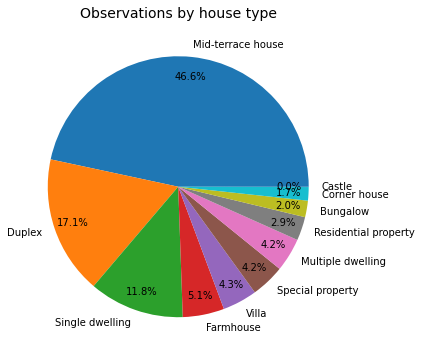

In [21]:
# Pie chart of distribution of houses across different types of house
pie, ax = plt.subplots(figsize=[10,6])
data = df['Type'].value_counts()
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.85)
plt.title("Observations by house type", fontsize=14)

**3. Data exploration**

We are going to use the dataset for two types of analysis:

- a data science analysis in which we will try to predict house prices based on their features;
- an economic analysis in which we will assess the individual impact of house characteristics on house prices, in order to determine what are the main drivers of prices.

First let's check the dataset for the presence of outliers.

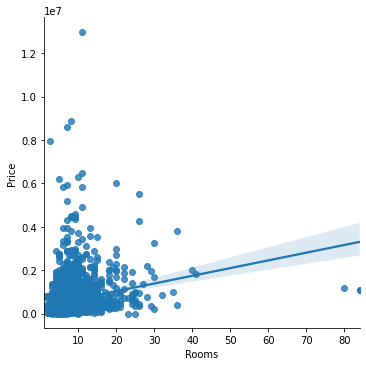

In [22]:
# Scatter plot of number of rooms and price
sns.lmplot(x = 'Rooms', y = 'Price', data = df)

There seem to be some outliers. In particular, we can see that there are some properties with extremely high prices and with unusually large number of rooms.

Let's check the distributions of both prices and number of rooms.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


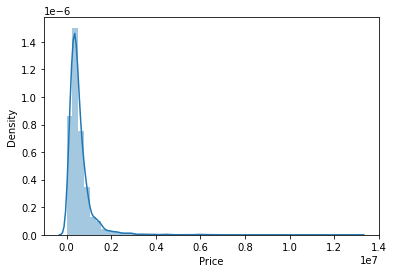

In [23]:
# Check distribution of prices
sns.distplot(df['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


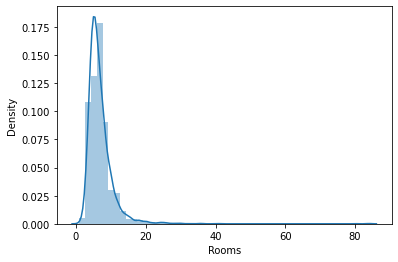

In [24]:
# Check distribution of number of rooms
sns.distplot(df['Rooms'])

The great majority of properties have a small number of rooms (as we would expect).

In order to make the observations more comparable to each other, we can restrict the dataset to include only houses that have up to a certain number of rooms. From the describe() command we know that the 75th percentile is at 8 rooms. Let's check what are the 90th, 95th and 99th percentiles.

In [25]:
# check top percentiles of rooms distribution
df['Rooms'].describe(percentiles = [0.9, 0.95, 0.99])

count    4983.000000
mean        6.896849
std         3.861733
min         1.000000
50%         6.000000
90%        10.000000
95%        13.000000
99%        20.000000
max        84.000000
Name: Rooms, dtype: float64

95% of the houses have 13 or fewer rooms. We can restrict the dataset only to these observations without losing too many observations, and this will make the remaining observations more comparable. Then let's check again if we find any outliers.

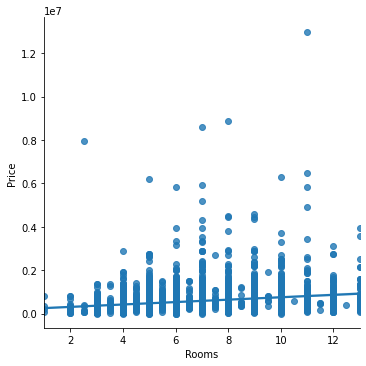

In [26]:
# filter the data to keep only houses with 12 or fewer rooms
df = df[df['Rooms'] <= 13]

# Scatter plot of number of rooms and price
sns.lmplot(x = 'Rooms', y = 'Price', data = df)

There are still some outliers in terms of price, as prices above around 2 million euros (the 0.2 tick mark in the chart) are much more dispersed and do not fit nicely around the main trend.

Let's inspect the top percentiles of the price distribution.

In [27]:
# check top percentiles of rooms distribution
df['Price'].describe(percentiles = [0.9, 0.95, 0.99])

count    4.778000e+03
mean     5.553983e+05
std      5.716595e+05
min      0.000000e+00
50%      4.250000e+05
90%      9.950000e+05
95%      1.380000e+06
99%      2.711500e+06
max      1.300000e+07
Name: Price, dtype: float64

90% of the observations have a price of less than 1 million euros. We can therefore restrict the dataset to include only houses with a price lower than 1 million euros in order to eliminate many outliers.

Then let's check the scatter plot of number of rooms and prices again, this time introducing different colours for different types of houses.

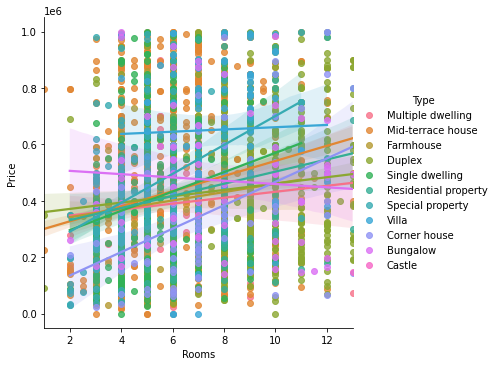

In [28]:
# filter the data to keep only houses with a price of 1 million or less
df = df[df['Price'] <= 1000000]

# Scatter plot of number of rooms and price
sns.lmplot(x = 'Rooms', y = 'Price', hue = 'Type', data = df)

We still see some dispersion around the trends, but the datapoints are now more compact and we should be able to control for the large variation in prices by introducing additional features in our models, such as the number of bathrooms, the state where the house is located, the condition of the house, the year when it was built, etc.

However, we can still filter out some outliers by looking at the box plots of prices for different types of houses.

[Text(0, 0, 'Multiple dwelling'),
 Text(0, 0, 'Mid-terrace house'),
 Text(0, 0, 'Farmhouse'),
 Text(0, 0, 'Duplex'),
 Text(0, 0, 'Single dwelling'),
 Text(0, 0, 'Residential property'),
 Text(0, 0, 'Special property'),
 Text(0, 0, 'Villa'),
 Text(0, 0, 'Corner house'),
 Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Castle')]

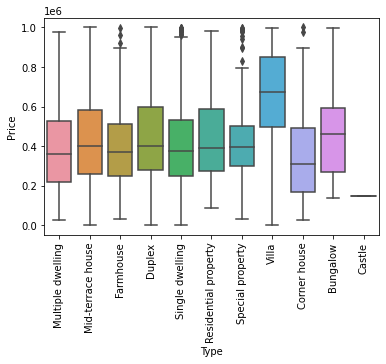

In [29]:
# box plots of prices for different types of house
chart = sns.boxplot(x = df.Type, y = df.Price)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

There are still some price outliers for the following categories of houses: farmhouse, single dwelling, special property and corner house.

We can also see that there is now only one castle in the dataset, as the box plot is collapsed to a single line. We can exclude this observation as it has no other datapoints comparable to it, so our dataset will be limited only to houses.

In [30]:
# remove the castle from the dataframe
df = df[df['Type'] != 'Castle']

# check that only houses remain in the dataset
df['Type'].unique()

array(['Multiple dwelling', 'Mid-terrace house', 'Farmhouse', 'Duplex',
       'Single dwelling', 'Residential property', 'Special property',
       'Villa', 'Corner house', 'Bungalow'], dtype=object)

Let's create some filters to exclude the outliers for each category of house.

In [31]:
## Create filters based on interquartile range for different types of houses
# Farmhouse
df_temp = df[df['Type'] == 'Farmhouse']
Q1 = df_temp['Price'].quantile(0.25)
Q3 = df_temp['Price'].quantile(0.75)
IQR = Q3 - Q1
filter_farm = (df['Price'] >= Q1 - 1.5 * IQR) & (df['Price'] <= Q3 + 1.5 *IQR) & (df['Type'] == 'Farmhouse')

# Single dwelling
df_temp = df[df['Type'] == 'Single dwelling']
Q1 = df_temp['Price'].quantile(0.25)
Q3 = df_temp['Price'].quantile(0.75)
IQR = Q3 - Q1
filter_single = (df['Price'] >= Q1 - 1.5 * IQR) & (df['Price'] <= Q3 + 1.5 *IQR) & (df['Type'] == 'Single dwelling')

# Special property
df_temp = df[df['Type'] == 'Special property']
Q1 = df_temp['Price'].quantile(0.25)
Q3 = df_temp['Price'].quantile(0.75)
IQR = Q3 - Q1
filter_special = (df['Price'] >= Q1 - 1.5 * IQR) & (df['Price'] <= Q3 + 1.5 *IQR) & (df['Type'] == 'Special property')

# Corner house
df_temp = df[df['Type'] == 'Corner house']
Q1 = df_temp['Price'].quantile(0.25)
Q3 = df_temp['Price'].quantile(0.75)
IQR = Q3 - Q1
filter_corner = (df['Price'] >= Q1 - 1.5 * IQR) & (df['Price'] <= Q3 + 1.5 *IQR) & (df['Type'] == 'Corner house')

Now we can filter out all the outliers from the main dataframe. We need to define a summary filter that keeps the observations that satisfy at least one of the above conditions, and that it also keeps all the other observations for the other types of houses.

In [32]:
# create filter to keep all the other types of houses
filter_other = (df['Type'] == 'Multiple dwelling') | (df['Type'] == 'Mid-terrace house') | (df['Type'] == 'Duplex') | (df['Type'] == 'Residential property') | (df['Type'] == 'Villa') | (df['Type'] == 'Bungalow')

# create a new filter that captures all of the above
filter = (filter_farm | filter_single | filter_special | filter_corner | filter_other)

# create a new dataframe without outliers
df = df[filter]

# check the dimensions of the dataframe after filtering
df.shape

(4313, 13)

Let's check also whether there are other interesting relationships in the data.

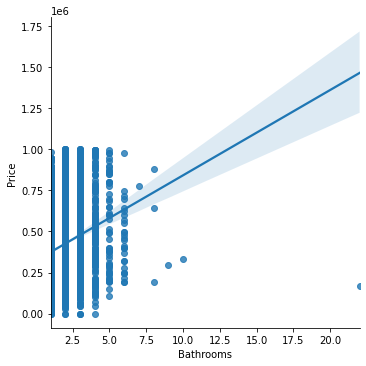

In [33]:
# check scatter plot of number of bathrooms and price
sns.lmplot(x = 'Bathrooms', y = 'Price', data = df)

The number of bathrooms appears to have a linear relationship with price, but we also see that there is clearly one outlier with >20 bathrooms. This doesn't make sense because we are considering only houses with 12 or less rooms, so we can remove this from the dataset. We can also remove some properties with 7 or more bathrooms as these datapoints appear quite dispersed and far away from the main cloud of data.

In [34]:
# remove the outliers for the number of bathrooms
df = df[df['Bathrooms'] <= 7]

Let's also check whether the age of a house has a significant relationship with its price. To do this, we first create a new variable that measures the age of a property as the difference between 2020 (the year when the dataset was compiled) and the year when the house was built.

In [35]:
# calculate the age of a property
df['Age'] = 2020 - df['Year_built']

Now let's plot a scatter plot of house ages and prices.

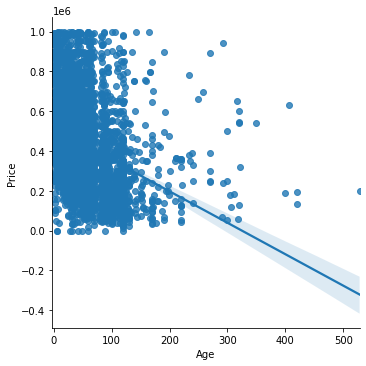

In [36]:
# check scatter plot of age and price
sns.lmplot(x = 'Age', y = 'Price', data = df)

Again we can see some outliers, as the vast majority of houses are 150 years old or less, while some properties are even older than 200 years. In order to make the datapoints more comparable with each other, we should exclude some of these outliers. Let's check the percentiles of the distribution of ages to see what could be a good cut-off age to eliminate outliers and still preserve as many datapoints as possible.

In [37]:
# check top percentiles of Age distribution
df['Age'].describe(percentiles = [0.9, 0.95, 0.99])

count    4307.000000
mean       54.687718
std        44.830747
min        -2.000000
50%        46.000000
90%       116.000000
95%       120.000000
99%       220.000000
max       528.000000
Name: Age, dtype: float64

95% of the properties are 120 years old or less. We can use this threshold to identify outliers and exclude all the houses that were built more than 120 years ago.

In [38]:
# exclude all houses built more than 120 years ago
df = df[df['Age'] <= 120]

# check dimensions of the updated dataframe
df.shape

(4099, 14)

Finally let's check if there are any outliers in the scatter plot of size of property (measured in terms of living space) and price.

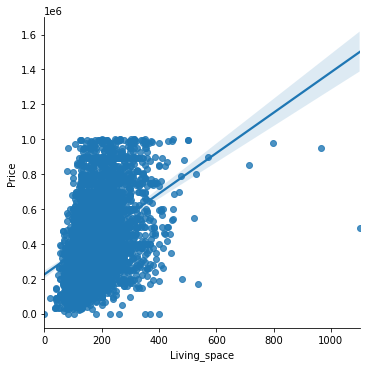

In [39]:
# Scatter plot of property size and property price
sns.lmplot(x = 'Living_space', y = 'Price', data = df)

Here we can see some outliers that have a living space larger than around 500 square metres, so we can exclude these from the dataset.

In [40]:
# exclude houses bigger than 500 square metres
df = df[df['Living_space'] <= 500]

# check the dimensions of the dataframe
df.shape

(4089, 14)

Let's check also the average prices for different categories of houses and in different states, to see whether these features are relevant drivers of house prices.

In [44]:
# calculate average price by type of house
df.groupby('Type', as_index=False)['Price'].mean()

,Type,Price
0,Bungalow,492715.160714
1,Corner house,325489.130435
2,Duplex,449632.835570
3,Farmhouse,382911.782787
4,Mid-terrace house,439383.871546
5,Multiple dwelling,395193.121693
6,Residential property,449499.084906
7,Single dwelling,398944.632184
8,Special property,399339.500000
9,Villa,654984.530864


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Corner house'),
 Text(0, 0, 'Duplex'),
 Text(0, 0, 'Farmhouse'),
 Text(0, 0, 'Mid-terrace house'),
 Text(0, 0, 'Multiple dwelling'),
 Text(0, 0, 'Residential property'),
 Text(0, 0, 'Single dwelling'),
 Text(0, 0, 'Special property'),
 Text(0, 0, 'Villa')]

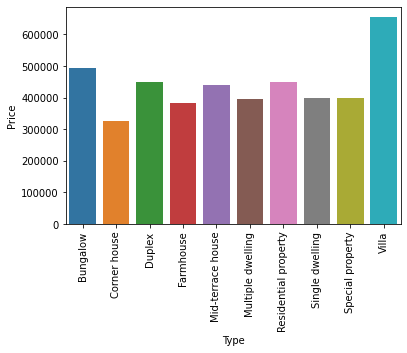

In [45]:
# average house price by house type
data = df.groupby('Type', as_index=False)['Price'].mean()
chart = sns.barplot('Type', 'Price', data=data, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Baden-Württemberg'),
 Text(0, 0, 'Bayern'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'Brandenburg'),
 Text(0, 0, 'Bremen'),
 Text(0, 0, 'Hamburg'),
 Text(0, 0, 'Hessen'),
 Text(0, 0, 'Mecklenburg-Vorpommern'),
 Text(0, 0, 'Niedersachsen'),
 Text(0, 0, 'Nordrhein-Westfalen'),
 Text(0, 0, 'Rheinland-Pfalz'),
 Text(0, 0, 'Saarland'),
 Text(0, 0, 'Sachsen'),
 Text(0, 0, 'Sachsen-Anhalt'),
 Text(0, 0, 'Schleswig-Holstein'),
 Text(0, 0, 'Thüringen')]

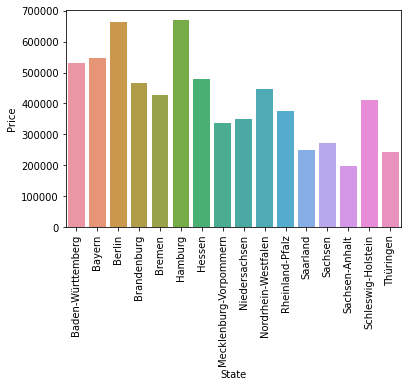

In [46]:
# average house price by State
data = df.groupby('State', as_index=False)['Price'].mean()
chart = sns.barplot('State', 'Price', data=data, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Both the State and the house type appear to have a relationship with house prices. In particular, average prices are much higher for villas, and in the Berlin and Hamburg States.

**4. Data science modelling and data visualisations**

**4.1 Classification tasks**

As a first step, I explore different classification algorithms to predict a house type based on its features and price.

I use first the K-Nearest-Neighbours algorithm and then the logistic regression model, and provide also some visualisations of the data and tests of the accuracy of the models.

**K-Nearest-Neighbours algorithm**

As a first task, I will develop a K-Nearest-Neighbours algorithm to predict a house type based on its features and price.

First we define the features and target data and then split the data into training and testing sets.

The target data is the type of house, while the features will be the following:
- number of rooms
- number of bedrooms
- number of bathrooms
- living space
- number of garages
- price.


In [47]:
# Import the module for train-test split
from sklearn.model_selection import train_test_split

# Define feature and target data for the classification
knn_feature_data = df[['Rooms', 'Bedrooms', 'Bathrooms', 'Living_space', 'Garages', 'Age', 'Price']]
knn_target_data = df[['Type']]

X = knn_feature_data
y = knn_target_data

# Define the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)

We have divided the dataset into 70% of observations used to train the algorithm, and 30% used to test it. More precisely, we have almost 2,900 houses in the training dataset and around 1,200 in the testing dataset, as shown below. Now we can use the testing set to assess the accuracy of the predicitions.

In [48]:
# Check the dimensions of the subsets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2862, 7)
(1227, 7)
(2862, 1)
(1227, 1)


Now we can import the KNN algorithm module.

In [49]:
# Import the KNN module
from sklearn.neighbors import KNeighborsClassifier


Then we run the KNN algorithm on the training set:

In [50]:
# Define the KNN models with different N numbers
knn5 = KNeighborsClassifier(n_neighbors=5)
knn25 = KNeighborsClassifier(n_neighbors=25)
knn50 = KNeighborsClassifier(n_neighbors=50)

# Fit the models
knn5.fit(X_train, y_train)
knn25.fit(X_train, y_train)
knn50.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

And we test the predictions on the testing set:

In [51]:
# Import module to calculate predictions accuracy
from sklearn import metrics

# Define the sets of predictions from the KNN models
y_pred5 = knn5.predict(X_test)
y_pred25 = knn25.predict(X_test)
y_pred50 = knn50.predict(X_test)

# Print the accuracy of each model
print('Accuracy with K=5: ', metrics.accuracy_score(y_test, y_pred5))
print('Accuracy with K=25: ', metrics.accuracy_score(y_test, y_pred25))
print('Accuracy with K=50: ', metrics.accuracy_score(y_test, y_pred50))

Accuracy with K=5:  0.44580277098614507
Accuracy with K=25:  0.4971475142624287
Accuracy with K=50:  0.5126324368378158


**KNN: Finding the best K**

From the previous code lines we could see that the accuracy of predictions was increasing as K became larger, but the accuracy did not change significantly between K = 25 and K = 50. Here I create a loop to run the KNN algorithm with several different values of K and then plot the accuracy scores obtained with each K, in order to identify the K that maximises prediction accuracy.

In [52]:
# Define a range of K from 1 to 100
k_range = range(1, 100)

# Initiate an empty list for accuracy scores
scores = []

# Loop: calculate accuracy for each K and append them in the list
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, np.ravel(y_train))
  y_pred = knn.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  scores.append(accuracy)
 

Text(0, 0.5, 'Accuracy of predictions')

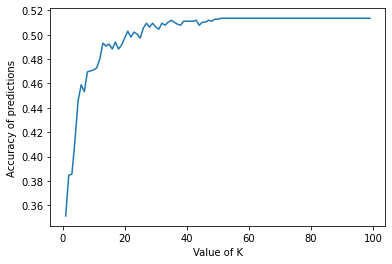

In [53]:
# Plot the accuracy score for different K numbers
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy of predictions')

It appears that the KNN algorithm reaches a maximum level of precision around 50% for K above 20. Once this level is achieved, the accuracy does not improve if K gets larger, and keeps oscillating around the 51% level.

This suggests that there is large variations in the characteristics of different types of houses, and the KNN algorithm is not able to identify the type of house with great accuracy based on the limited number of characteristics that we can feed to the algorithm. We only have a 51% chance of correctly predicting the house type with this algorithm.

**Visualisations**


<Figure size 432x288 with 0 Axes>

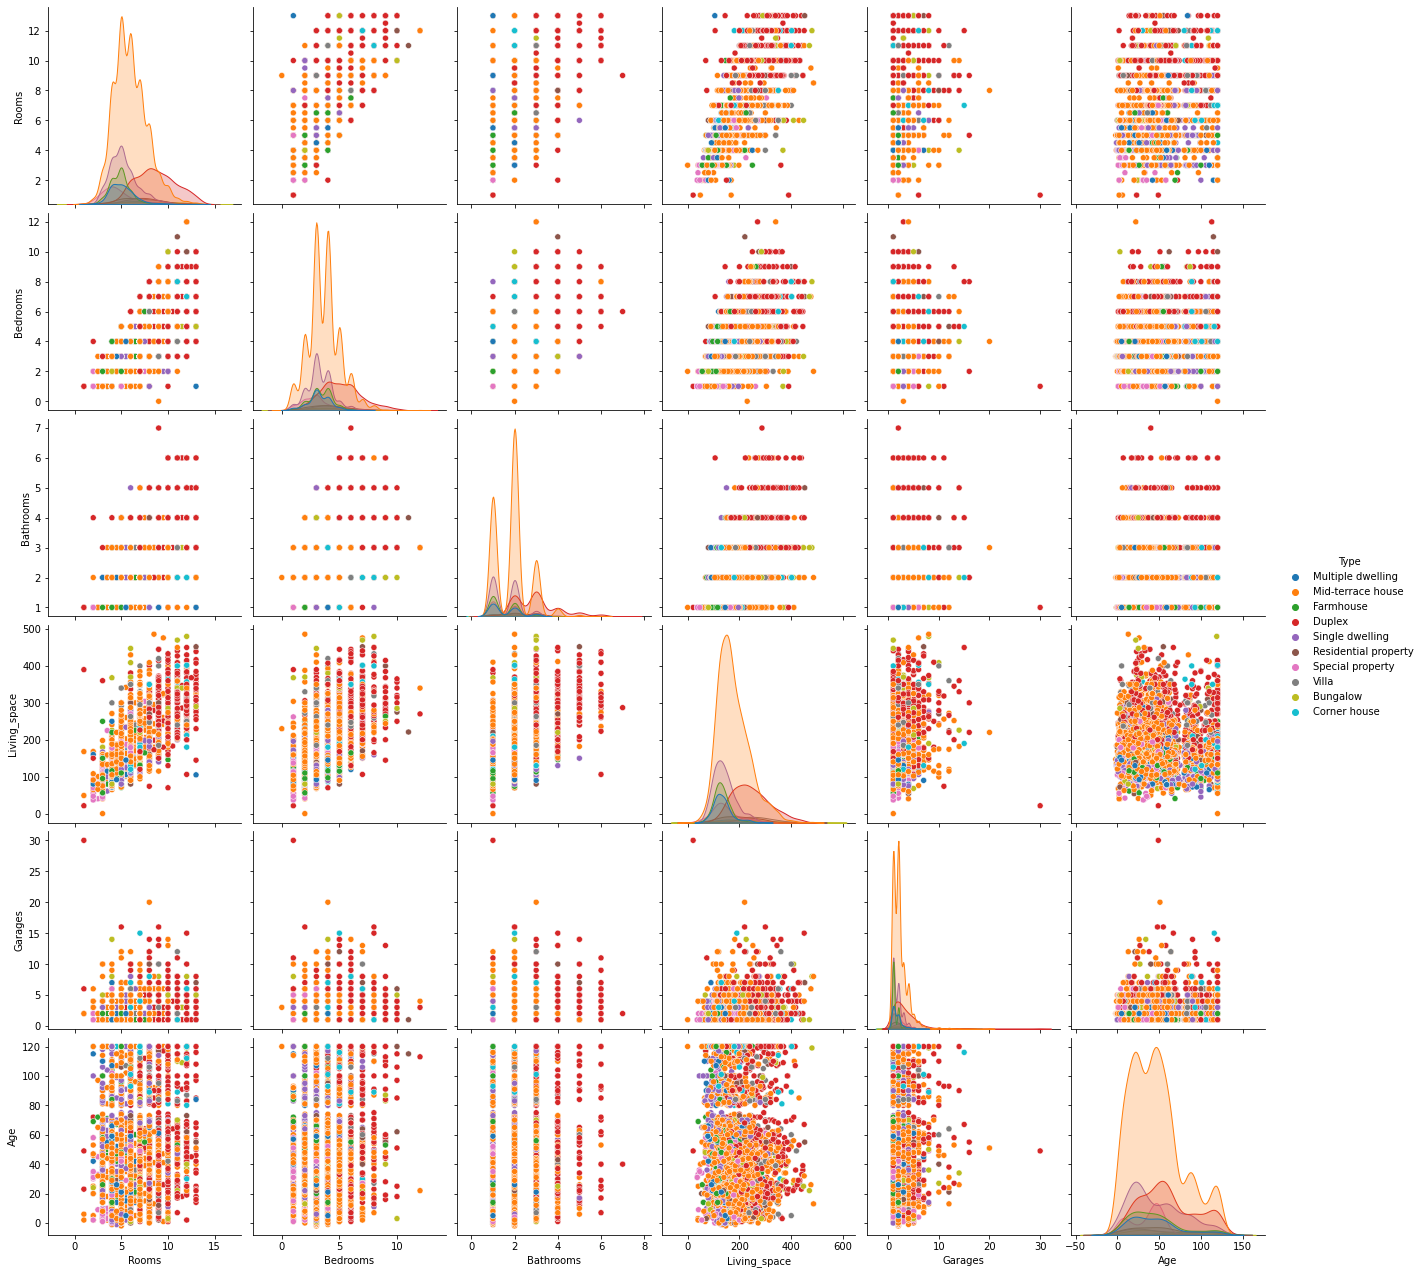

In [54]:
# Create a subset of the data with just the key house characteristics and type
subset_data = df[['Rooms', 'Bedrooms', 'Bathrooms', 'Living_space', 'Garages', 'Age', 'Type']]

# Plot pairwise plots for the main house characteristics split by house type
plt.figure()
sns.pairplot(subset_data, hue = 'Type', height = 3)
plt.show()

**Logistic regression**

Let's try the same classification exercise by using a logistic regression instead of a KNN algorithm.

In [55]:
# Define feature and target data for the logistic regression
log_feature_data = df[['Rooms', 'Bedrooms', 'Bathrooms', 'Living_space', 'Garages', 'Age', 'Price']]
log_target_data = df['Type']

X = log_feature_data
y = log_target_data

In [56]:
# Import the module for logistic regression
from sklearn.linear_model import LogisticRegression

# Define the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Logistic regresison: Assessing the accuracy of predictions: training and testing sets**

Let's assess the accuracy of the predictions by using training and testing sets, as shown above for KNN.

In [57]:
# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)

# Check dimensions of the sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2862, 7)
(1227, 7)
(2862,)
(1227,)


In [58]:
# Define and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create predictions
y_pred = logreg.predict(X_test)

In [59]:
# Print accuracy of the logistic regression
print('Accuracy of the logistic regression: ', metrics.accuracy_score(y_test, y_pred))

Accuracy of the logistic regression:  0.5191524042379788


Also the logistic regression reaches an accuracy level just above 50%. This suggests that, given the data available in this dataset, the house type cannot be identified with a good level of accuracy based on the houses features.

Next we look at whether the prices of properties can be predicted based on their features.

**4.2 Regression analysis**

**Linear regression**

Here we will use linear regression to predict the market value of a property based on their features, such as number of rooms, size, the year when the house was built, etc.

First, let's inspect some plots to assess whether there appears to be a strong relationship between the market value of a property and each of their main features (e.g. number of rooms, size, age).

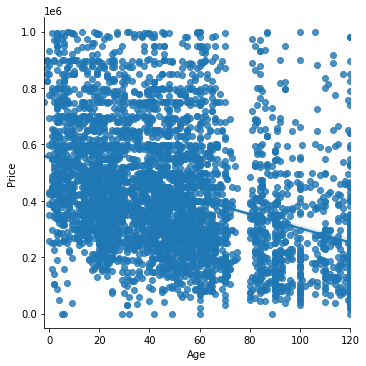

In [60]:
# Scatter plot of property age and price
sns.lmplot(x = 'Age', y = 'Price', data = df)

From this chart we can easily see that there are almost no houses in the dataset that are 75 to 80 years old. This is likely due to the fact that this age corresponds to building years between 1940 and 1945, when WWII was going on all over Europe. It is likely that house building significantly slow down in those years as the war was absorbing most of the economic resources at the time, and fewer money was being spent in housing investments.

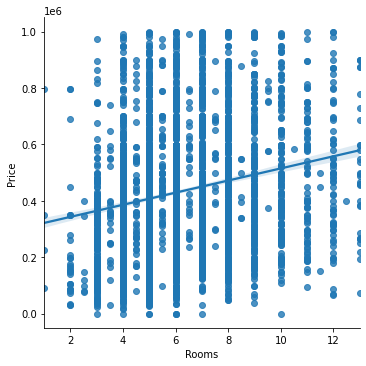

In [61]:
# Scatter plot of number of rooms and property price
sns.lmplot(x = 'Rooms', y = 'Price', data = df)

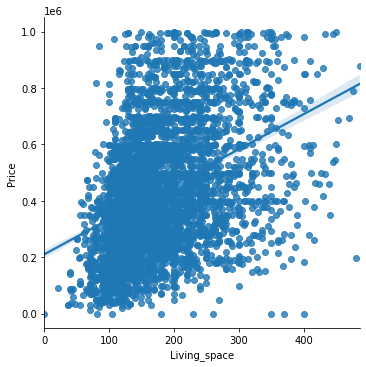

In [62]:
# Scatter plot of property size and property price
sns.lmplot(x = 'Living_space', y = 'Price', data = df)

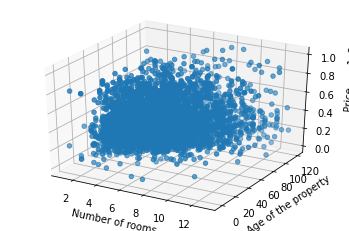

In [63]:
# Scatter plot of number of rooms, age and price
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = df['Rooms']
ys = df['Age']
zs = df['Price']
ax.scatter(xs, ys, zs)

ax.set_xlabel('Number of rooms')
ax.set_ylabel('Age of the property')
ax.set_zlabel('Price')

plt.show()

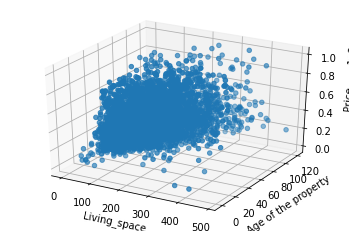

In [64]:
# Scatter plot of living space, age and price
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = df['Living_space']
ys = df['Age']
zs = df['Price']
ax.scatter(xs, ys, zs)

ax.set_xlabel('Living_space')
ax.set_ylabel('Age of the property')
ax.set_zlabel('Price')

plt.show()


The datapoints are quite dispersed around the linear trends if we look at price in combination with one other feature at a time, but the linear regression model allows also us to study the relationship between price and multiple features at the same time (multiple regression analysis). By introducing additional features in the regression model, we should be able to capture the effect of each of these factors on price, and we should be able to obtain reasonable accurate predictions even though the relationship does not appear strong between price and other variables taken individually.

Now let's try to use linear regression to predict a property's price based on its numerical and categorical characteristics.

First we note that we have some categorical variables (i.e. house type, condition, heating and state) and we need to transform them into numerical indicators in order to include them in the regression model.

We cannot simply assign them numbers from 1 to N because this would assume some relationship between different categories (e.g. if farmhouse is assigned 1 and mid-terrace house is assigned 2, then the latter would have an impact on price twice as large). Therefore we need to create multiple binary indicators ('dummies') that take values 1 or 0 for each category.

In [65]:
## Define the dummies with the get_dummies module
# dummies for house type
type_dummies = pd.get_dummies(df.Type, prefix='dummy')

# dummies for condition
condition_dummies = pd.get_dummies(df.Condition, prefix='dummy')

# dummies for heating
heating_dummies = pd.get_dummies(df.Heating, prefix='dummy')

# dummies for State
state_dummies = pd.get_dummies(df.State, prefix='dummy')

Now we need to combine the dataframes with the dummies with the main dataframe that contains the original dataset. We can do this with the 'concatenate' function from Pandas.

In [66]:
# Create a new version of the dataset that includes also the dummies
df_dummy = pd.concat([df, type_dummies, condition_dummies, heating_dummies, state_dummies], axis = 1)

# drop the old categorical variables
df_dummy = df_dummy.drop(columns = ['Type', 'Condition', 'Heating', 'State'])

# Inspect the dataset
df_dummy.head()

,Unnamed: 0,Price,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Year_built,Garages,Age,dummy_Bungalow,dummy_Corner house,dummy_Duplex,dummy_Farmhouse,dummy_Mid-terrace house,dummy_Multiple dwelling,dummy_Residential property,dummy_Single dwelling,dummy_Special property,dummy_Villa,dummy_by arrangement,dummy_dilapidated,dummy_first occupation,dummy_first occupation after refurbishment,dummy_fixer-upper,dummy_maintained,dummy_modernized,dummy_refurbished,dummy_renovated,dummy_central heating,dummy_cogeneration units,dummy_district heating,dummy_electric heating,dummy_floor heating,dummy_gas heating,dummy_heat pump,dummy_night storage heater,dummy_oil heating,dummy_solar heating,dummy_stove heating,dummy_underfloor heating,dummy_wood-pellet heating,dummy_Baden-Württemberg,dummy_Bayern,dummy_Berlin,dummy_Brandenburg,dummy_Bremen,dummy_Hamburg,dummy_Hessen,dummy_Mecklenburg-Vorpommern,dummy_Niedersachsen,dummy_Nordrhein-Westfalen,dummy_Rheinland-Pfalz,dummy_Saarland,dummy_Sachsen,dummy_Sachsen-Anhalt,dummy_Schleswig-Holstein,dummy_Thüringen
0,0,498000.0,106.00,229.0,5.5,3.0,1.0,2005.0,2.0,15.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,495000.0,140.93,517.0,6.0,3.0,2.0,1994.0,7.0,26.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,749000.0,162.89,82.0,5.0,3.0,2.0,2013.0,1.0,7.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,469000.0,115.00,244.0,4.5,2.0,1.0,1968.0,1.0,52.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,11,470000.0,268.00,1511.0,12.0,9.0,3.0,1976.0,4.0,44.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's check the number of rows and columns in the dataframe after adding the dummies.

In [68]:
# inspect dimensions of the dataframe
df_dummy.shape

(4089, 58)

Now we can run a linear regression model that includes also the dummy variables.

In [69]:
## Define feature and target data for the linear regression
reg_feature_data = df_dummy.drop(columns = ['Price'])
reg_target_data = df_dummy['Price']

X = reg_feature_data
y = reg_target_data

In [70]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression

# Define the model
linreg = LinearRegression()

# Fit the model
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's see how well the regression can predict the market value of properties. Let's extract the data for some of the houses and see what the linear regression model predicts for them.

**Linear regression: testing the accuracy of predictions**

Here I will calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) statistics to assess the accuracy of the regression model.

First let's try some simple manual predictions. Let's inspect the prices for the first 5 observations from the y vector of prices:

In [71]:
# inspect the prices of the first 5 observations
y.head()

0     498000.0
1     495000.0
2     749000.0
4     469000.0
11    470000.0
Name: Price, dtype: float64

Now let's check how well the model performs in predicting the prices for the first 5 observations. First we extract the vectors of features for each of the observations and we store them in separate variables:

In [72]:
# Extract the features for the first 5 observations
X0 = X.loc[[0]]
X1 = X.loc[[1]]
X2 = X.loc[[2]]
X4 = X.loc[[4]]
X11 = X.loc[[11]]

Now let's check the predicted prices for each observation:

In [74]:
# calculate predicted prices
y0 = linreg.predict(X0)
y1 = linreg.predict(X1)
y2 = linreg.predict(X2)
y4 = linreg.predict(X4)
y11 = linreg.predict(X11)

# print the results
print("Observation 0: actual price = ", y.loc[0], "; predicted price = ", y0)
print("Observation 1: actual price = ", y.loc[1], "; predicted price = ", y1)
print("Observation 2: actual price = ", y.loc[2], "; predicted price = ", y2)
print("Observation 4: actual price = ", y.loc[4], "; predicted price = ", y4)
print("Observation 11: actual price = ", y.loc[11], "; predicted price = ", y11)

Observation 0: actual price =  498000.0 ; predicted price =  [483701.55107025]
Observation 1: actual price =  495000.0 ; predicted price =  [518783.32141826]
Observation 2: actual price =  749000.0 ; predicted price =  [621450.66507241]
Observation 4: actual price =  469000.0 ; predicted price =  [397156.72253318]
Observation 11: actual price =  470000.0 ; predicted price =  [589415.99057953]


We can already see from these simple comparisons that some prices are predicted quite accurately (e.g. the price of observation 0), while others are predicted very poorly (e.g. the price of observation 11). This suggests that the overall accuracy of the linear regression model is probably not very good. To verify this, let's calculate the MSE, RMSE and MAE.

In [75]:
# Import new modules
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Create the predictions from the linear regression
y_predicted = linreg.predict(X)

# Calculate the errors of the model
error = mean_squared_error(y, y_predicted)
root_error = math.sqrt(mean_squared_error(y, y_predicted))
mean_abs_error = mean_absolute_error(y, y_predicted)

# Display the errors
print('Mean Squared Error: ', error)
print('Root Mean Squared Error: ', root_error)
print('Mean Absolute Error: ', mean_abs_error)

Mean Squared Error:  25847488820.977177
Root Mean Squared Error:  160771.5423231897
Mean Absolute Error:  123875.39850586581


RMSE and MAE are not too different, so this means that the errors of the regression model tends to be of the same magnitude. The errors are quite high. The MAE amounts to 123,875, which is around 29% of the average price in the dataset, as shown below:

In [76]:
# calculate average price in the sample
print("Average price in the dataset: ", y.mean())

# calculate MAE as a proportion of the average price
print("MAE as a proportion of average price: ", mean_abs_error/y.mean())

Average price in the dataset:  432463.56468574225
MAE as a proportion of average price:  0.28644123718464515


**Linear regression: restricting the dataset to improve accuracy**

The reason for the low accuracy of the predictions might be that the dataset still captures too much variation in the distribution of values, so that the datapoints are too dispersed around the linear regression line, and therefore predictions are not precise.

Let's have a look at the distribution of market values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


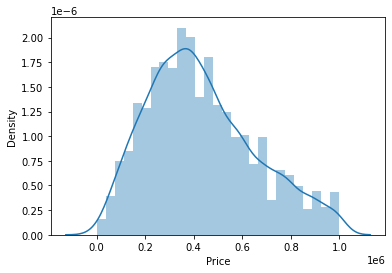

In [77]:
# Inspect the distribution of market values
sns.distplot(df_dummy['Price'])

The distribution is slightly skewed, with more observations in the 0 to 600,000 price range. Let's see what the median and quartiles are:

In [78]:
# Check the key statistics of market values
df_dummy['Price'].describe()

count       4089.000000
mean      432463.564686
std       222490.555795
min            0.000000
25%       269000.000000
50%       399000.000000
75%       575000.000000
max      1000000.000000
Name: Price, dtype: float64

The linear regression predictions would get better if we considered only the observations with market value closer to the median of the distribution. Let's try to restrict the dataset to observations that are within the interquartile range of market values and see if the predictions improve.

As shown above, the first quartile corresponds to a market value of 269,000 EUR and the third quartile corresponds to a market value of 575,000 EUR.

In [79]:
# Define filters to identify observations in the inter-quartile range
filter_value1 = df_dummy['Price'] > 269000
filter_value2 = df_dummy['Price'] < 575000

# Apply filters to the dataset
df_new = df_dummy[filter_value1 & filter_value2]

# Inspect the statistics of the updated dataset
df_new.describe()

,Unnamed: 0,Price,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Year_built,Garages,Age,dummy_Bungalow,dummy_Corner house,dummy_Duplex,dummy_Farmhouse,dummy_Mid-terrace house,dummy_Multiple dwelling,dummy_Residential property,dummy_Single dwelling,dummy_Special property,dummy_Villa,dummy_by arrangement,dummy_dilapidated,dummy_first occupation,dummy_first occupation after refurbishment,dummy_fixer-upper,dummy_maintained,dummy_modernized,dummy_refurbished,dummy_renovated,dummy_central heating,dummy_cogeneration units,dummy_district heating,dummy_electric heating,dummy_floor heating,dummy_gas heating,dummy_heat pump,dummy_night storage heater,dummy_oil heating,dummy_solar heating,dummy_stove heating,dummy_underfloor heating,dummy_wood-pellet heating,dummy_Baden-Württemberg,dummy_Bayern,dummy_Berlin,dummy_Brandenburg,dummy_Bremen,dummy_Hamburg,dummy_Hessen,dummy_Mecklenburg-Vorpommern,dummy_Niedersachsen,dummy_Nordrhein-Westfalen,dummy_Rheinland-Pfalz,dummy_Saarland,dummy_Sachsen,dummy_Sachsen-Anhalt,dummy_Schleswig-Holstein,dummy_Thüringen
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,5252.499751,407207.090095,176.250199,896.995754,6.092832,3.805874,1.948233,1976.571926,2.205575,43.428074,0.013440,0.008462,0.146341,0.066700,0.493280,0.045296,0.023892,0.131409,0.060727,0.010453,0.000996,0.122947,0.007964,0.034843,0.040816,0.076655,0.529617,0.091588,0.094574,0.049776,0.000996,0.012444,0.012444,0.007964,0.004480,0.103534,0.019910,0.062718,0.001493,0.697362,0.019910,0.006969,0.122947,0.111996,0.011946,0.047785,0.002489,0.001991,0.087108,0.030363,0.156297,0.205575,0.095072,0.010453,0.025884,0.012942,0.070682,0.006471
std,2908.071807,82572.936561,64.562734,1380.271348,2.073168,1.459324,0.874215,28.756931,1.564690,28.756931,0.115176,0.091621,0.353536,0.249564,0.500079,0.208005,0.152752,0.337931,0.238888,0.101729,0.031544,0.328458,0.088908,0.183428,0.197914,0.266110,0.499246,0.288515,0.292699,0.217536,0.031544,0.110884,0.110884,0.088908,0.066798,0.304731,0.139727,0.242515,0.038624,0.459514,0.139727,0.083208,0.328458,0.315440,0.108671,0.213364,0.049838,0.044588,0.282063,0.171628,0.363227,0.404222,0.293388,0.101729,0.158827,0.113051,0.256357,0.080201
min,0.000000,269500.000000,55.000000,0.000000,1.000000,0.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2868.000000,340000.000000,130.000000,388.000000,5.000000,3.000000,1.000000,1962.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5459.000000,399000.000000,160.000000,636.000000,6.000000,4.000000,2.000000,1980.000000,

Let's run the regression model again and let's try some new predictions.

In [80]:
# Define the feature and target data
reg_feature_data = df_new.drop(columns = ['Price'])
reg_target_data = df_new['Price']

X = reg_feature_data
y = reg_target_data

# Define the model
linreg2 = LinearRegression()

# Fit the model
linreg2.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's assess the accuracy of the model by calculating again the Mean Squared Error, Root Mean Squared Error and Mean Absolute Error statistics. Below we can see that the errors are much smaller when the regression model is run on the restricted sample.

In [81]:
# Create the predictions from the regression model
y_predicted = linreg2.predict(X)

# Calculate the errors of the model
error = mean_squared_error(y, y_predicted)
root_error = math.sqrt(mean_squared_error(y, y_predicted))
mean_abs_error = mean_absolute_error(y, y_predicted)

# Display the errors
print('Mean Squared Error: ', error)
print('Root Mean Squared Error: ', root_error)
print('Mean Absolute Error: ', mean_abs_error)

Mean Squared Error:  5660420564.456345
Root Mean Squared Error:  75235.76652401665
Mean Absolute Error:  62913.340901107884


**Polynomial regression**

Here I check whether the predictions would improve if I used a polynomial regression instead of a linear regression model. First I define the polynomial model, where I use only polynomials of 2nd degree, to keep the model as simple as possible, while still allowing the model to better capture the variance in the data.

In [82]:
# Import the module for the polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Define the model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
poly.fit(X_poly, y)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Polynomial regression: assessing the accuracy of the model**

As above, I assess the accuracy of the model by calculating again the Mean Squared Error, Root Mean Squared Error and Mean Absolute Error statistics. Below we can see that the errors are much smaller when the regression model is run on the restricted sample and with a polynomial fit.

In [83]:
# Create the predictions from the linear regression
y_predicted = pol_reg.predict(poly.fit_transform(X))

# Calculate the errors
error = mean_squared_error(y, y_predicted)
root_error = math.sqrt(mean_squared_error(y, y_predicted))
mean_abs_error = mean_absolute_error(y, y_predicted)

# Display the errors
print('Mean Squared Error: ', error)
print('Root Mean Squared Error: ', root_error)
print('Mean Absolute Error: ', mean_abs_error)

Mean Squared Error:  3445553608.8680935
Root Mean Squared Error:  58698.83822417692
Mean Absolute Error:  44815.537083125935


The errors are lower than those for the linear regression model because the polynomial regression can better explain the variance of house prices. The Root Mean Squared Error also gets closer to the Mean Absolute Error, meaning that the errors of the polynomial model have a more homogeneous magnitude compared to the errors of the linear regression model. All of this indicates that the polynomial regression model is better than the linear model to predict the prices of the houses in this dataset.

We can see this also by visually checking the predictions for the prices of some of the observations in the dataset, as done previously. First we identify the prices for some of the observations: 

In [84]:
# inspect the prices of the first 5 observations
y.head()

0     498000.0
1     495000.0
4     469000.0
11    470000.0
19    359000.0
Name: Price, dtype: float64

Now let's check how well the model performs in predicting the prices for the first 5 observations. First we extract the vectors of features for each of the observations and we store them in separate variables:

In [85]:
# Extract the features for the first 5 observations
X0 = X.loc[[0]]
X1 = X.loc[[1]]
X4 = X.loc[[4]]
X11 = X.loc[[11]]
X19 = X.loc[[19]]

# transform them to polynomial
X_poly0 = poly.fit_transform(X0)
X_poly1 = poly.fit_transform(X1)
X_poly4 = poly.fit_transform(X4)
X_poly11 = poly.fit_transform(X11)
X_poly19 = poly.fit_transform(X19)


Now let's check the predicted prices for each observation:

In [87]:
# calculate predicted prices
y_poly0 = pol_reg.predict(X_poly0)
y_poly1 = pol_reg.predict(X_poly1)
y_poly4 = pol_reg.predict(X_poly4)
y_poly11 = pol_reg.predict(X_poly11)
y_poly19 = pol_reg.predict(X_poly19)

# print the results
print("Observation 0: actual price = ", y.loc[0], "; predicted price = ", y_poly0)
print("Observation 1: actual price = ", y.loc[1], "; predicted price = ", y_poly1)
print("Observation 4: actual price = ", y.loc[4], "; predicted price = ", y_poly4)
print("Observation 11: actual price = ", y.loc[11], "; predicted price = ", y_poly11)
print("Observation 19: actual price = ", y.loc[19], "; predicted price = ", y_poly19)

Observation 0: actual price =  498000.0 ; predicted price =  [525404.5]
Observation 1: actual price =  495000.0 ; predicted price =  [507166.5]
Observation 4: actual price =  469000.0 ; predicted price =  [439720.5]
Observation 11: actual price =  470000.0 ; predicted price =  [485625.]
Observation 19: actual price =  359000.0 ; predicted price =  [385980.]


All of the predictions now are very close to the actual prices.

**5. Economic analysis**

In this section of the project I will explore some Python packages designed to perform economic and econometric analysis.

In the next sections of the project I will focus on new packages designed specifically for statistical and econometric analyses. I will use the 'statsmodel' package to develop a linear regression model to investigate which are the main drivers of house prices and what is the impact of each feature on the final price of a property. This package allows us to check the values of all the regression coefficients and assess whether they are statistically significant, so that we can determine which features are relevant drivers of house prices.

First I import the relevant package.

In [88]:
# import the statsmodel package
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


A linear regression model is defined as follows.

Here I run first a very simple regression including only some of the numerical variables in the model, leaving the categorical variables aside for the moment.

In [89]:
# define the regression equation
reg1 = 'Price~Rooms+Living_space+Age'

# run the regression on the dataframe
reg1output = smf.ols(reg1, df).fit()

Now we can generate a summary of the regression as follows.

In [90]:
# print the regression output summary
print(reg1output.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     548.1
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          2.37e-299
Time:                        10:58:20   Log-Likelihood:                -55456.
No. Observations:                4089   AIC:                         1.109e+05
Df Residuals:                    4085   BIC:                         1.109e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.391e+05   9752.450     34.768   

The regression output displays the values of the regression coefficients (including the intercept), and their standard errors. The value of a coefficient measures the impact of changes in an explanatory variable on the dependant variable. For example, the coefficient on Living_space, equal to 1377, indicates that if the living space of a house increases by 1 square meter, the price is expected to increase by around 1,377 euros.

For each variable, the summary also displays information on their statistical significance (t-statistic, p-value, and 95% confidence interval), calculated on the basis of the coefficient value and the standard error. A p-value below 0.05 generally indicates that a coefficient is statistically significant, meaning that we can reasonably sure that the true value of the coefficient is actually different from zero. Usually in statistical analyses we want to test the null hypothesis that a coefficient is zero (meaning that there is no relationship between the dependent and independent variables) and the p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis was correct.

The above regression output shows that all the independent variables have statistically significant coefficients, but we can see that the coefficient on the number of rooms is negative, which makes no economic sense. We would expect that the price of a house would increase with a larger number of rooms, so observing this counterintuitive result suggests that the model is not well specified. In fact, we have used very few explanatory variables so far, and we can see that the model does not explain a large part of the variation in prices because the R-squared is 0.287, which is not very high.

Let's try to improve the performance of the model by including additional explanatory variables. First we can include additional numerical variables that we haven't used yet.

In [91]:
# define the regression equation
reg2 = 'Price~Rooms+Bathrooms+Living_space+Age+Garages'

# run the regression on the dataframe
reg2output = smf.ols(reg2, df).fit()

In [92]:
# print the regression output summary
print(reg2output.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     334.8
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          2.54e-301
Time:                        10:58:29   Log-Likelihood:                -55445.
No. Observations:                4089   AIC:                         1.109e+05
Df Residuals:                    4083   BIC:                         1.109e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      3.38e+05   9856.348     34.296   

Most variables have statistically significant coefficients, but some of the coefficients still have the wrong sign from an economic perspective (e.g. Rooms).

Let's try adding also some categorical variables that can help explain the variation in prices, such as the type of house, type of heating, house condition and the State where the property is located. Here we don't need to transform these categorical variables into series of binary dummies because the statsmodel package does this automatically when running the regression model.

However, when adding indicators for categorical variables that can take multiple values, one of the values has to be excluded from the regression model as it will serve as the reference group for the other categories. For example, if we only had houses of 3 colours (red, green and blue), we could decide to exclude the indicator for the colour red, and then we would interpret the coefficients on the indicators for green and blue as the average difference in price for green (or blue) houses relative to red houses, which are now the reference group.

If we do not specify anything, statsmodel will assume that the reference group is the first category in alphabetical order (i.e. it will be 'bungalow' for the type of house and 'Baden-Wurttemberg' for the State), as we can see below, where these indicators are missing from the list of variables.

In [93]:
# define the regression equation
reg3 = "Price~Rooms+Bathrooms+Living_space+Age+Type+Condition+Heating+State"

# run the regression on the dataframe
reg3output = smf.ols(reg3, df).fit()

In [94]:
# print the regression output summary
print(reg3output.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     75.70
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:59:22   Log-Likelihood:                -54836.
No. Observations:                4089   AIC:                         1.098e+05
Df Residuals:                    4040   BIC:                         1.101e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

However, in many cases it is useful to be able to choose what the reference group should be, for example if we are interested to show differences in average prices with respect to a given type of house (e.g. we want to check if flats are on average more expensive than terraced houses). In this case, it could be useful to use as a reference group the categories that have the most datapoints. Let's see with some bar plots which categories have the most datapoints.


[Text(0, 0, 'Baden-Württemberg'),
 Text(0, 0, 'Rheinland-Pfalz'),
 Text(0, 0, 'Hessen'),
 Text(0, 0, 'Bayern'),
 Text(0, 0, 'Berlin'),
 Text(0, 0, 'Brandenburg'),
 Text(0, 0, 'Bremen'),
 Text(0, 0, 'Niedersachsen'),
 Text(0, 0, 'Hamburg'),
 Text(0, 0, 'Nordrhein-Westfalen'),
 Text(0, 0, 'Mecklenburg-Vorpommern'),
 Text(0, 0, 'Saarland'),
 Text(0, 0, 'Sachsen'),
 Text(0, 0, 'Sachsen-Anhalt'),
 Text(0, 0, 'Schleswig-Holstein'),
 Text(0, 0, 'Thüringen')]

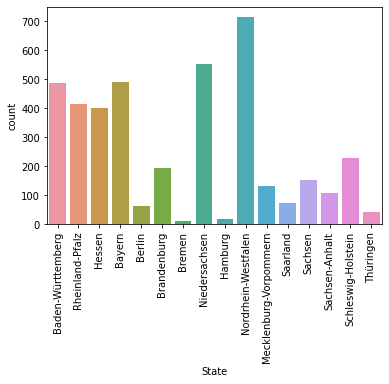

In [95]:
# Bar chart to display the distribution of houses over the different States
chart = sns.countplot(x='State', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Multiple dwelling'),
 Text(0, 0, 'Mid-terrace house'),
 Text(0, 0, 'Farmhouse'),
 Text(0, 0, 'Duplex'),
 Text(0, 0, 'Single dwelling'),
 Text(0, 0, 'Residential property'),
 Text(0, 0, 'Special property'),
 Text(0, 0, 'Villa'),
 Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Corner house')]

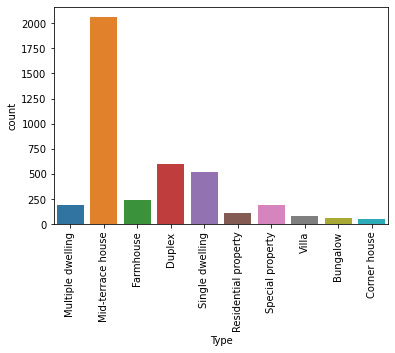

In [96]:
# Bar chart to display the distribution of houses over the different types
chart = sns.countplot(x='Type', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'modernized'),
 Text(0, 0, 'dilapidated'),
 Text(0, 0, 'refurbished'),
 Text(0, 0, 'maintained'),
 Text(0, 0, 'renovated'),
 Text(0, 0, 'first occupation after refurbishment'),
 Text(0, 0, 'fixer-upper'),
 Text(0, 0, 'first occupation'),
 Text(0, 0, 'by arrangement')]

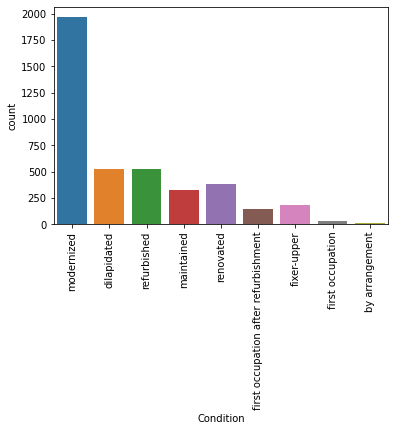

In [97]:
# Bar chart to display the distribution of houses over the different conditions
chart = sns.countplot(x='Condition', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'central heating'),
 Text(0, 0, 'stove heating'),
 Text(0, 0, 'oil heating'),
 Text(0, 0, 'gas heating'),
 Text(0, 0, 'underfloor heating'),
 Text(0, 0, 'night storage heater'),
 Text(0, 0, 'floor heating'),
 Text(0, 0, 'district heating'),
 Text(0, 0, 'heat pump'),
 Text(0, 0, 'electric heating'),
 Text(0, 0, 'solar heating'),
 Text(0, 0, 'wood-pellet heating'),
 Text(0, 0, 'cogeneration units')]

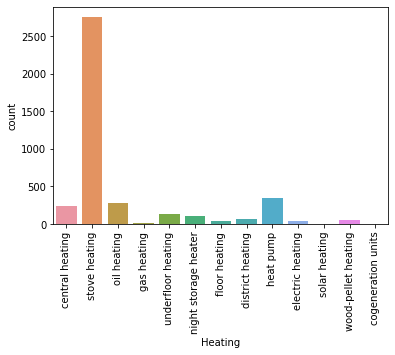

In [98]:
# Bar chart to display the distribution of houses over the different types of heating
chart = sns.countplot(x='Heating', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

The categories with more observations are:
- Nordrhein-Westfalen for the State variable;
- Mid-terrace house for the Type variable;
- Modernized for the Condition variable; and
- Stove heating for the Heating variable.

Let's use these as the reference groups for the indicators. In statsmodels, we can specify the reference category in the regression equation as follows:

In [99]:
# define the regression equation
reg4 = """Price~Rooms+Bathrooms+Living_space+Age
          +C(Type, Treatment(reference = 'Mid-terrace house'))
          +C(Condition, Treatment(reference = 'modernized'))
          +C(Heating, Treatment(reference = 'stove heating'))
          +C(State, Treatment(reference = 'Nordrhein-Westfalen'))"""

# run the regression on the dataframe
reg4output = smf.ols(reg4, df).fit()

In [100]:
# print the regression output summary
print(reg4output.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     75.70
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:59:44   Log-Likelihood:                -54836.
No. Observations:                4089   AIC:                         1.098e+05
Df Residuals:                    4040   BIC:                         1.101e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

We can see that coefficient on Rooms still has wrong sign. At this point, after having controlled for a large number of variables, the more likely explanation is that there could be some non-linear relationships in the data that our model is not capturing appropriately.

For example, the number of rooms could have a non-linear relationship with price. The number of rooms could be very relevant and have a big impact on price when we start from a small numbers of rooms, for example going from 2 to 3 rooms. This is a big increase in the number of rooms and usually it corresponds also to a significant increase in the overall size of the house, so we can expect that it would have a large impact on price. On the other hand, going from 10 to 11 rooms would have a smaller impact on price as the house is likely already very big and adding just one more room does not make a big difference.

In order to test this, let's define a new variable equal to the number of rooms squared, so we can include it in the regression (in addition to the simple number of rooms) to capture a non-linear relationship between price and number of rooms.

In [101]:
# create a new variable equal to the square of number of rooms
df['Rooms_2'] = df['Rooms']**2

Now let's run the regression model again by including also the new Rooms_2 variable.

In [102]:
# define the regression equation
reg5 = """Price~Rooms+Rooms_2+Bathrooms+Living_space+Age
          +C(Type, Treatment(reference = 'Mid-terrace house'))
          +C(Condition, Treatment(reference = 'modernized'))
          +C(Heating, Treatment(reference = 'stove heating'))
          +C(State, Treatment(reference = 'Nordrhein-Westfalen'))"""

# run the regression on the dataframe
reg5output = smf.ols(reg5, df).fit()

In [103]:
# print the regression output summary
print(reg5output.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     74.73
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:00:06   Log-Likelihood:                -54829.
No. Observations:                4089   AIC:                         1.098e+05
Df Residuals:                    4039   BIC:                         1.101e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Now all the variables have the right sign.

This analysis shows that a number of explanatory variables have a statistically significant impact on the price of a house. The number of rooms, number of bathrooms, size and age of a house all have a statistically significant impact. The analysis tells us that:

- When the living space of a house increases by 1 square meter, price on average increases by 1,113 euros;
- When the house gets one year older, its price decreases on average by around 1,500 euros;
- When a bathroom is added, the price increases on average by 26,000 euros;
- When the number of rooms increases by one, the price on average increases by 15,570 euros.

The coefficient on the number of rooms squared (Rooms_2) is negative, and this indicates that as the number of rooms get larger, the marginal impact of adding one more room to the house will become smaller and smaller, which is in line with our expectations.

Also some of the indicators have a statistically significant effect on price and for some of them the effect is quite large (i.e. they have large coefficients). For example, houses located in Bayern are on average 82,500 euros more expensive than houses in Nordrheinland-Westfalen (which is our reference group for the States), and villas are around 106,000 euros more expensive on average than mid-terrace houses (our reference group for the type of house).

Finally, we have a coefficient also on the linear intercept of the regression model. This parameter captures the average price for a house in the case where all our control variables are equal to 0 (i.e. for a house with 0 rooms, 0 age, 0 living space, and belonging to our reference groups for the categorical variables). As such, this parameter does not have a relevant economic interpretation.
